 # Introduction: Rock/Mine Prediction 
     
This notebook is intended to gain some hands-on experience in implementing deep learning models using tensorflow library. In this notebook, we will build a model that can help the Naval Officers to identify whether an obstacle is a rock or a mine in the war zone using various sonar parameters. This is a standard supervised classification task:
-  __Supervised:__ The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features 
-  __Classification:__ The label is a binary variable, R (represents Rock), M (represents Mine)


## Data

The data is taken from UCI Machine Learning Repository: __[Sonar Dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/)__.


## Workflow
![image1.PNG](images/image1.PNG)

Although this notebook presents the final model, lots of model were being tried to reach this final model (starting from just 2 hidden layers with 50 neurons each and relu activation to finally 4 hidden layers with 60 neurons each and sigmoid activation). The final model gives the accuracy of about 90%. 

### Imports
We are using a typical data science stack: numpy, pandas, sklearn, matplotlib, and deep learning framwork: tensorflow. 

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# sklearn utils for shuffling the data
from sklearn.utils import shuffle

# sklearn model selection for splitting the data into training and testing data
from sklearn.model_selection import train_test_split

# tensorflow for building the model
import tensorflow as tf

# matplotlib for plotting
import matplotlib.pyplot as plt

### Read in data

In [2]:
data = pd.read_csv("C:\Data\sonar_data")

# 'x' represents features and 'y' represents labels
x = data[data.columns[0:60]].values
y = data[data.columns[60]]

x = np.array(x)
y = np.array(y)

In [3]:
# Encode the labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = y.reshape(-1,1)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

In [4]:
# shuffle the data
x,y = shuffle(x,y, random_state=1)

In [5]:
# Split the data into train and test with 80% training data and 20% testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

### Model Parameters
We are building a fully connected neural network with 4 hidden layers, each consists of 60 neurons. The problem that we are solving is a binary classification problem, so the output layer consists of 2 neurons, corresponding to 2 classes (Rock and Mine). 

In [22]:
# Define the important parameters and variables to work with the tensors
col = x_train.shape[1]
learning_rate = 0.3
epochs = 1000

# Define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60
n_class = 2

# X and Y are 2 placeholders, to which we will provide the data during session run
X = tf.placeholder(tf.float32, [None, col])
Y = tf.placeholder(tf.float32, [None, n_class])



### Define the model
We will intitalise the weights and biases of our network using truncated normal distribution. We will use sigmoid activation function for the network. We will use cross entropy loss function with Gradient Descent optimizer. 

In [23]:
# Initialise the weights of the network
weights = {
    "h1": tf.Variable(tf.truncated_normal([col,n_hidden_1])),
    "h2": tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    "h3": tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    "h4": tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    "hout": tf.Variable(tf.truncated_normal([n_hidden_4,n_class]))
    }

# Initialise the biases of the neurons in the network
biases = {
    "b1": tf.Variable(tf.truncated_normal([n_hidden_1])),
    "b2": tf.Variable(tf.truncated_normal([n_hidden_2])),
    "b3": tf.Variable(tf.truncated_normal([n_hidden_3])),
    "b4": tf.Variable(tf.truncated_normal([n_hidden_4])),
    "bout": tf.Variable(tf.truncated_normal([n_class]))
    }

# function to build the model  
def model(x, weights, biases):
    #  first hidden layer with 60 neurons and sigmoid activation function
    layer_1 = tf.add(tf.matmul(x,weights["h1"]), biases["b1"])
    layer_1 = tf.nn.sigmoid(layer_1)

    # second hidden layer with 60 neurons and sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1,weights["h2"]), biases["b2"])
    layer_2 = tf.nn.sigmoid(layer_2)

    # third hidden layer with 60 neurons and sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_2,weights["h3"]), biases["b3"])
    layer_3 = tf.nn.sigmoid(layer_3)

    # fourth hidden layer with 60 neurons and sigmoid activation
    layer_4 = tf.add(tf.matmul(layer_3,weights["h4"]), biases["b4"])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    # final output layer with 2 neurons, each corresponding to a class (rock and mine)   
    out = tf.add(tf.matmul(layer_4, weights["hout"]), biases["bout"])
    return out

# y_cap is the predicted outcome of our model
y_cap = model(X, weights, biases)

In [24]:
# to initialise all the variables
init  = tf.global_variables_initializer()

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = y_cap, labels = Y))

# optimizer
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess= tf.Session()
sess.run(init)

### Train the model

In [25]:
train_accuracy_history = []
test_accuracy_history = []
train_loss_history = []
test_loss_history = []

for epoch in range(epochs):
    # Run the session
    sess.run(train, feed_dict = {X:x_train, Y:y_train})
    
    # Calculate train and test cost
    train_cost = sess.run(cost, feed_dict = {X: x_train, Y:y_train})
    pred_y, test_cost = sess.run([y_cap, cost], feed_dict = {X:x_test, Y:y_test})
    
    train_loss_history.append(train_cost)
    test_loss_history.append(test_cost)
    
    # Calculate train and test accuracy
    correct_prediction = tf.equal(tf.argmax(y_cap,1), tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    train_accuracy = (sess.run(accuracy, feed_dict = {X:x_train, Y:y_train}))
    test_accuracy = (sess.run(accuracy, feed_dict = {X:x_test, Y:y_test}))
    
    train_accuracy_history.append(train_accuracy)
    test_accuracy_history.append(test_accuracy)

    print("epoch:", epoch, "-", "train_loss:", train_cost, "-","test_loss:",test_cost, "-", "train_acc:", train_accuracy, "-", "test_acc:", test_accuracy )
    

epoch: 0 - train_loss: 2.568661 - test_loss: 2.7337604 - train_acc: 0.53939396 - test_acc: 0.52380955
epoch: 1 - train_loss: 3.6529026 - test_loss: 3.5292315 - train_acc: 0.46060607 - test_acc: 0.47619048
epoch: 2 - train_loss: 2.4666817 - test_loss: 2.5671208 - train_acc: 0.53939396 - test_acc: 0.52380955
epoch: 3 - train_loss: 1.9665279 - test_loss: 1.8831807 - train_acc: 0.46060607 - test_acc: 0.47619048
epoch: 4 - train_loss: 2.7885995 - test_loss: 2.901849 - train_acc: 0.53939396 - test_acc: 0.52380955
epoch: 5 - train_loss: 1.2847089 - test_loss: 1.2353331 - train_acc: 0.46060607 - test_acc: 0.47619048
epoch: 6 - train_loss: 2.5499432 - test_loss: 2.6541615 - train_acc: 0.53939396 - test_acc: 0.52380955
epoch: 7 - train_loss: 1.3509814 - test_loss: 1.304091 - train_acc: 0.46060607 - test_acc: 0.47619048
epoch: 8 - train_loss: 2.4794397 - test_loss: 2.5796185 - train_acc: 0.53939396 - test_acc: 0.52380955
epoch: 9 - train_loss: 1.3159672 - test_loss: 1.273637 - train_acc: 0.460606

epoch: 80 - train_loss: 1.3887331 - test_loss: 1.4187979 - train_acc: 0.53939396 - test_acc: 0.52380955
epoch: 81 - train_loss: 1.1291012 - test_loss: 1.1153562 - train_acc: 0.46060607 - test_acc: 0.47619048
epoch: 82 - train_loss: 1.3789333 - test_loss: 1.4078743 - train_acc: 0.53939396 - test_acc: 0.52380955
epoch: 83 - train_loss: 1.1249248 - test_loss: 1.1126256 - train_acc: 0.46060607 - test_acc: 0.47619048
epoch: 84 - train_loss: 1.3696278 - test_loss: 1.3974059 - train_acc: 0.53939396 - test_acc: 0.52380955
epoch: 85 - train_loss: 1.120979 - test_loss: 1.1101084 - train_acc: 0.46060607 - test_acc: 0.47619048
epoch: 86 - train_loss: 1.3608458 - test_loss: 1.3874154 - train_acc: 0.53939396 - test_acc: 0.52380955
epoch: 87 - train_loss: 1.1172607 - test_loss: 1.1077963 - train_acc: 0.46060607 - test_acc: 0.47619048
epoch: 88 - train_loss: 1.3526043 - test_loss: 1.3779161 - train_acc: 0.53939396 - test_acc: 0.52380955
epoch: 89 - train_loss: 1.1137588 - test_loss: 1.1056764 - train_

epoch: 159 - train_loss: 0.9767848 - test_loss: 1.0038631 - train_acc: 0.46666667 - test_acc: 0.47619048
epoch: 160 - train_loss: 1.1026545 - test_loss: 1.0704031 - train_acc: 0.53939396 - test_acc: 0.52380955
epoch: 161 - train_loss: 0.9729621 - test_loss: 1.0010389 - train_acc: 0.46666667 - test_acc: 0.47619048
epoch: 162 - train_loss: 1.0972102 - test_loss: 1.0637347 - train_acc: 0.53939396 - test_acc: 0.52380955
epoch: 163 - train_loss: 0.96910596 - test_loss: 0.99821824 - train_acc: 0.46666667 - test_acc: 0.47619048
epoch: 164 - train_loss: 1.0917789 - test_loss: 1.0570905 - train_acc: 0.53939396 - test_acc: 0.52380955
epoch: 165 - train_loss: 0.965189 - test_loss: 0.99536633 - train_acc: 0.46666667 - test_acc: 0.47619048
epoch: 166 - train_loss: 1.0863107 - test_loss: 1.0504205 - train_acc: 0.53939396 - test_acc: 0.52380955
epoch: 167 - train_loss: 0.9611848 - test_loss: 0.9924486 - train_acc: 0.46666667 - test_acc: 0.47619048
epoch: 168 - train_loss: 1.0807567 - test_loss: 1.043

epoch: 238 - train_loss: 0.87085664 - test_loss: 0.80781364 - train_acc: 0.55151516 - test_acc: 0.54761904
epoch: 239 - train_loss: 0.809237 - test_loss: 0.87550664 - train_acc: 0.53333336 - test_acc: 0.5
epoch: 240 - train_loss: 0.86690634 - test_loss: 0.80355054 - train_acc: 0.55757576 - test_acc: 0.54761904
epoch: 241 - train_loss: 0.8062077 - test_loss: 0.8733876 - train_acc: 0.53939396 - test_acc: 0.5
epoch: 242 - train_loss: 0.8629737 - test_loss: 0.79933655 - train_acc: 0.55757576 - test_acc: 0.54761904
epoch: 243 - train_loss: 0.8031799 - test_loss: 0.8712498 - train_acc: 0.54545456 - test_acc: 0.5
epoch: 244 - train_loss: 0.85905385 - test_loss: 0.7951663 - train_acc: 0.55757576 - test_acc: 0.54761904
epoch: 245 - train_loss: 0.80015147 - test_loss: 0.8690903 - train_acc: 0.54545456 - test_acc: 0.5
epoch: 246 - train_loss: 0.85514295 - test_loss: 0.79103523 - train_acc: 0.55757576 - test_acc: 0.54761904
epoch: 247 - train_loss: 0.79712063 - test_loss: 0.86690587 - train_acc: 0

epoch: 318 - train_loss: 0.71789575 - test_loss: 0.66113806 - train_acc: 0.6545454 - test_acc: 0.6666667
epoch: 319 - train_loss: 0.68604165 - test_loss: 0.7691474 - train_acc: 0.6484848 - test_acc: 0.54761904
epoch: 320 - train_loss: 0.7143118 - test_loss: 0.65808004 - train_acc: 0.6545454 - test_acc: 0.6666667
epoch: 321 - train_loss: 0.6829425 - test_loss: 0.76600295 - train_acc: 0.6545454 - test_acc: 0.54761904
epoch: 322 - train_loss: 0.7107453 - test_loss: 0.6550532 - train_acc: 0.6545454 - test_acc: 0.6666667
epoch: 323 - train_loss: 0.6798432 - test_loss: 0.7628451 - train_acc: 0.6606061 - test_acc: 0.54761904
epoch: 324 - train_loss: 0.7071967 - test_loss: 0.6520576 - train_acc: 0.6606061 - test_acc: 0.6666667
epoch: 325 - train_loss: 0.6767441 - test_loss: 0.7596748 - train_acc: 0.6606061 - test_acc: 0.54761904
epoch: 326 - train_loss: 0.7036658 - test_loss: 0.649093 - train_acc: 0.6606061 - test_acc: 0.6666667
epoch: 327 - train_loss: 0.6736447 - test_loss: 0.7564931 - train

epoch: 397 - train_loss: 0.5619522 - test_loss: 0.64143574 - train_acc: 0.7030303 - test_acc: 0.61904764
epoch: 398 - train_loss: 0.58172476 - test_loss: 0.5541657 - train_acc: 0.6969697 - test_acc: 0.71428573
epoch: 399 - train_loss: 0.5585714 - test_loss: 0.638042 - train_acc: 0.7090909 - test_acc: 0.61904764
epoch: 400 - train_loss: 0.57823 - test_loss: 0.5515086 - train_acc: 0.6969697 - test_acc: 0.71428573
epoch: 401 - train_loss: 0.55518126 - test_loss: 0.6346454 - train_acc: 0.7090909 - test_acc: 0.61904764
epoch: 402 - train_loss: 0.5747238 - test_loss: 0.5488384 - train_acc: 0.6969697 - test_acc: 0.71428573
epoch: 403 - train_loss: 0.5517839 - test_loss: 0.6312482 - train_acc: 0.7090909 - test_acc: 0.64285713
epoch: 404 - train_loss: 0.57120794 - test_loss: 0.54615635 - train_acc: 0.7030303 - test_acc: 0.71428573
epoch: 405 - train_loss: 0.54838115 - test_loss: 0.6278526 - train_acc: 0.7090909 - test_acc: 0.6666667
epoch: 406 - train_loss: 0.56768435 - test_loss: 0.543464 - tr

epoch: 476 - train_loss: 0.46110728 - test_loss: 0.46406886 - train_acc: 0.7818182 - test_acc: 0.7380952
epoch: 477 - train_loss: 0.4433602 - test_loss: 0.53352964 - train_acc: 0.76969695 - test_acc: 0.6904762
epoch: 478 - train_loss: 0.45882046 - test_loss: 0.46253994 - train_acc: 0.7818182 - test_acc: 0.7380952
epoch: 479 - train_loss: 0.44118047 - test_loss: 0.5320128 - train_acc: 0.76969695 - test_acc: 0.6904762
epoch: 480 - train_loss: 0.45656684 - test_loss: 0.46104503 - train_acc: 0.7818182 - test_acc: 0.7380952
epoch: 481 - train_loss: 0.4390317 - test_loss: 0.5305436 - train_acc: 0.76969695 - test_acc: 0.6904762
epoch: 482 - train_loss: 0.4543446 - test_loss: 0.45958233 - train_acc: 0.7818182 - test_acc: 0.7380952
epoch: 483 - train_loss: 0.43691236 - test_loss: 0.5291198 - train_acc: 0.76969695 - test_acc: 0.6904762
epoch: 484 - train_loss: 0.45215213 - test_loss: 0.45814985 - train_acc: 0.7818182 - test_acc: 0.7380952
epoch: 485 - train_loss: 0.43482107 - test_loss: 0.527739

epoch: 556 - train_loss: 0.38465106 - test_loss: 0.41861784 - train_acc: 0.8121212 - test_acc: 0.7380952
epoch: 557 - train_loss: 0.37071633 - test_loss: 0.49549076 - train_acc: 0.8181818 - test_acc: 0.6904762
epoch: 558 - train_loss: 0.38296473 - test_loss: 0.41773552 - train_acc: 0.8121212 - test_acc: 0.7380952
epoch: 559 - train_loss: 0.3691325 - test_loss: 0.4948812 - train_acc: 0.8181818 - test_acc: 0.6904762
epoch: 560 - train_loss: 0.38128528 - test_loss: 0.41686264 - train_acc: 0.8121212 - test_acc: 0.7380952
epoch: 561 - train_loss: 0.3675563 - test_loss: 0.49428162 - train_acc: 0.8181818 - test_acc: 0.6904762
epoch: 562 - train_loss: 0.37961245 - test_loss: 0.41599873 - train_acc: 0.8181818 - test_acc: 0.7380952
epoch: 563 - train_loss: 0.36598742 - test_loss: 0.4936912 - train_acc: 0.8181818 - test_acc: 0.6904762
epoch: 564 - train_loss: 0.377946 - test_loss: 0.41514352 - train_acc: 0.8181818 - test_acc: 0.7380952
epoch: 565 - train_loss: 0.3644258 - test_loss: 0.4931103 - t

epoch: 635 - train_loss: 0.31322873 - test_loss: 0.4770258 - train_acc: 0.8666667 - test_acc: 0.6904762
epoch: 636 - train_loss: 0.32103902 - test_loss: 0.3889812 - train_acc: 0.830303 - test_acc: 0.7380952
epoch: 637 - train_loss: 0.31184062 - test_loss: 0.47664964 - train_acc: 0.8666667 - test_acc: 0.6904762
epoch: 638 - train_loss: 0.31952265 - test_loss: 0.38835073 - train_acc: 0.830303 - test_acc: 0.7380952
epoch: 639 - train_loss: 0.3104558 - test_loss: 0.47627616 - train_acc: 0.8666667 - test_acc: 0.6904762
epoch: 640 - train_loss: 0.3180094 - test_loss: 0.38772434 - train_acc: 0.8363636 - test_acc: 0.7380952
epoch: 641 - train_loss: 0.30907443 - test_loss: 0.47590542 - train_acc: 0.8666667 - test_acc: 0.6904762
epoch: 642 - train_loss: 0.31649956 - test_loss: 0.3871024 - train_acc: 0.8363636 - test_acc: 0.7380952
epoch: 643 - train_loss: 0.30769622 - test_loss: 0.47553703 - train_acc: 0.8666667 - test_acc: 0.71428573
epoch: 644 - train_loss: 0.31499273 - test_loss: 0.38648447 -

epoch: 714 - train_loss: 0.2639503 - test_loss: 0.36662728 - train_acc: 0.8727273 - test_acc: 0.8095238
epoch: 715 - train_loss: 0.2594924 - test_loss: 0.46113256 - train_acc: 0.9030303 - test_acc: 0.7380952
epoch: 716 - train_loss: 0.26251394 - test_loss: 0.3660631 - train_acc: 0.8727273 - test_acc: 0.8095238
epoch: 717 - train_loss: 0.2581572 - test_loss: 0.4606077 - train_acc: 0.9030303 - test_acc: 0.7380952
epoch: 718 - train_loss: 0.26107702 - test_loss: 0.36549634 - train_acc: 0.8727273 - test_acc: 0.8095238
epoch: 719 - train_loss: 0.25682035 - test_loss: 0.46007228 - train_acc: 0.9030303 - test_acc: 0.7380952
epoch: 720 - train_loss: 0.25963953 - test_loss: 0.36492655 - train_acc: 0.8727273 - test_acc: 0.8095238
epoch: 721 - train_loss: 0.25548136 - test_loss: 0.4595252 - train_acc: 0.9030303 - test_acc: 0.7380952
epoch: 722 - train_loss: 0.2582011 - test_loss: 0.36435342 - train_acc: 0.8727273 - test_acc: 0.8095238
epoch: 723 - train_loss: 0.25414035 - test_loss: 0.45896694 - 

epoch: 793 - train_loss: 0.20449196 - test_loss: 0.43021932 - train_acc: 0.91515154 - test_acc: 0.78571427
epoch: 794 - train_loss: 0.20431142 - test_loss: 0.33957106 - train_acc: 0.8969697 - test_acc: 0.8333333
epoch: 795 - train_loss: 0.20295002 - test_loss: 0.42905885 - train_acc: 0.91515154 - test_acc: 0.78571427
epoch: 796 - train_loss: 0.20270267 - test_loss: 0.3387019 - train_acc: 0.8969697 - test_acc: 0.8333333
epoch: 797 - train_loss: 0.201398 - test_loss: 0.4278732 - train_acc: 0.92121214 - test_acc: 0.78571427
epoch: 798 - train_loss: 0.2010843 - test_loss: 0.3378188 - train_acc: 0.8969697 - test_acc: 0.8333333
epoch: 799 - train_loss: 0.19983567 - test_loss: 0.4266615 - train_acc: 0.92121214 - test_acc: 0.78571427
epoch: 800 - train_loss: 0.199456 - test_loss: 0.33692154 - train_acc: 0.8969697 - test_acc: 0.8333333
epoch: 801 - train_loss: 0.19826284 - test_loss: 0.42542377 - train_acc: 0.92121214 - test_acc: 0.78571427
epoch: 802 - train_loss: 0.1978175 - test_loss: 0.3360

epoch: 871 - train_loss: 0.1282351 - test_loss: 0.34629557 - train_acc: 0.95151514 - test_acc: 0.8333333
epoch: 872 - train_loss: 0.12567133 - test_loss: 0.28406313 - train_acc: 0.95151514 - test_acc: 0.88095236
epoch: 873 - train_loss: 0.124750555 - test_loss: 0.3407165 - train_acc: 0.95151514 - test_acc: 0.8333333
epoch: 874 - train_loss: 0.12212041 - test_loss: 0.28064558 - train_acc: 0.95151514 - test_acc: 0.88095236
epoch: 875 - train_loss: 0.121017985 - test_loss: 0.33460394 - train_acc: 0.95757574 - test_acc: 0.8333333
epoch: 876 - train_loss: 0.11833532 - test_loss: 0.27694666 - train_acc: 0.95151514 - test_acc: 0.88095236
epoch: 877 - train_loss: 0.117047384 - test_loss: 0.32798284 - train_acc: 0.95757574 - test_acc: 0.8333333
epoch: 878 - train_loss: 0.11433723 - test_loss: 0.27300692 - train_acc: 0.95151514 - test_acc: 0.88095236
epoch: 879 - train_loss: 0.112877876 - test_loss: 0.32094273 - train_acc: 0.95757574 - test_acc: 0.85714287
epoch: 880 - train_loss: 0.11017914 - t

epoch: 949 - train_loss: 0.069060974 - test_loss: 0.22686279 - train_acc: 0.9939394 - test_acc: 0.9047619
epoch: 950 - train_loss: 0.068336144 - test_loss: 0.22697313 - train_acc: 0.9939394 - test_acc: 0.9047619
epoch: 951 - train_loss: 0.06764296 - test_loss: 0.22706893 - train_acc: 0.9939394 - test_acc: 0.9047619
epoch: 952 - train_loss: 0.06697891 - test_loss: 0.22715078 - train_acc: 0.9939394 - test_acc: 0.9047619
epoch: 953 - train_loss: 0.06634183 - test_loss: 0.22721903 - train_acc: 0.9939394 - test_acc: 0.9047619
epoch: 954 - train_loss: 0.06572971 - test_loss: 0.2272742 - train_acc: 0.9939394 - test_acc: 0.9047619
epoch: 955 - train_loss: 0.06514071 - test_loss: 0.22731681 - train_acc: 0.9939394 - test_acc: 0.9047619
epoch: 956 - train_loss: 0.06457324 - test_loss: 0.22734758 - train_acc: 0.9939394 - test_acc: 0.9047619
epoch: 957 - train_loss: 0.064025864 - test_loss: 0.22736675 - train_acc: 0.9939394 - test_acc: 0.9047619
epoch: 958 - train_loss: 0.06349714 - test_loss: 0.22

### Plot the training and testing graphs

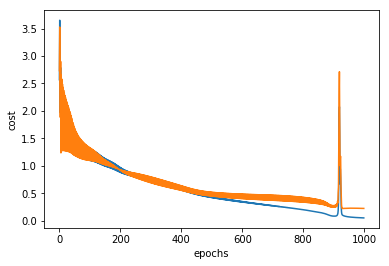

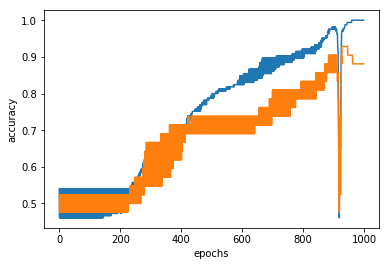

In [26]:
# Plot cost and accuracy graph
plt.plot(train_loss_history)
plt.plot(test_loss_history)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()
plt.plot(train_accuracy_history)
plt.plot(test_accuracy_history)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In the above graphs, blue represents training cost and training accuracy, and orange represents test cost and test accuracy. From the above graphs, we can observe that our model is getting into the problem of overfitting as training accuracy is approaching 1 while test accuracy is around 0.88. The graphs also have large variations. 

There can be many reasons for overfitting:                                                                                       
a) Bad Network/Model                                                                                                             
b) Too many neurons                                                                                                            
c) Not enough data

For this model we can try to reduce overfitting by introducing regularization technique, namely Dropout. This issue of overfitting in this model is dealt in another notebook, and the issue of large variations is also discussed.  